In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargar dataset preparada previamente
df_partidos = pd.read_csv("../partidos_cebollitas_fe82a1a4-e109-41b1-8b78-d9b4341dacaf.csv")
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [2]:
df_partidos_cebollitas = df_partidos[(df_partidos['equipo_local'] == 'Cebollitas FC') | (df_partidos['equipo_visitante'] == 'Cebollitas FC')]
df_partidos_cebollitas.reset_index(drop=True, inplace=True)
df_partidos = df_partidos_cebollitas.copy()
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
2,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
3,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena
4,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML


In [3]:
# Aplicar Normalización a tiros al arco (aprox. 0-15 tiros)
scaler_norm = MinMaxScaler()

df_partidos['tiros_arco_local_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_local']])
df_partidos['tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_visitante']])

# Ver resultados
display(df_partidos[['tiros_arco_local', 'tiros_arco_local_norm']].head(6))
display(df_partidos[['tiros_arco_visitante', 'tiros_arco_visitante_norm']].head(6))

,tiros_arco_local,tiros_arco_local_norm
0,12,1.000000
1,10,0.777778
2,7,0.444444
3,8,0.555556
4,5,0.222222
5,10,0.777778


,tiros_arco_visitante,tiros_arco_visitante_norm
0,6,0.250
1,7,0.375
2,12,1.000
3,11,0.875
4,5,0.125
5,7,0.375


In [6]:
# Aplicar Estandarización a posesión (%)
scaler_std = StandardScaler()

df_partidos['posesion_local_std'] = scaler_std.fit_transform(df_partidos[['posesion_local (%)']])
df_partidos['posesion_visitante_std'] = scaler_std.fit_transform(df_partidos[['posesion_visitante (%)']])

# Ver resultados
display(df_partidos[['posesion_local (%)', 'posesion_local_std']].head())
display(df_partidos[['posesion_visitante (%)', 'posesion_visitante_std']].head())

,posesion_local (%),posesion_local_std
0,54,0.543776
1,55,0.721007
2,52,0.189315
3,60,1.607160
4,56,0.898237


,posesion_visitante (%),posesion_visitante_std
0,46,-0.543776
1,45,-0.721007
2,48,-0.189315
3,40,-1.607160
4,44,-0.898237


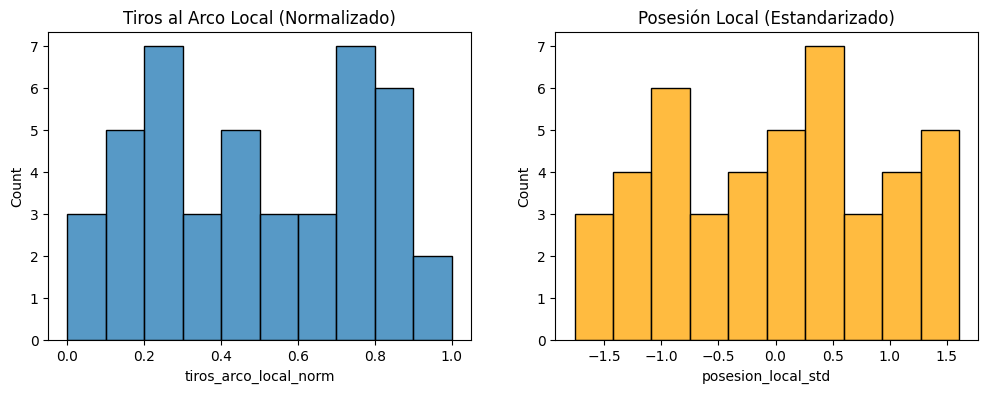

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Visualizar tiros al arco (Normalización)
sns.histplot(df_partidos['tiros_arco_local_norm'], bins=10, ax=ax[0])
ax[0].set_title('Tiros al Arco Local (Normalizado)')

# Visualizar posesión (Estandarización)
sns.histplot(df_partidos['posesion_local_std'], bins=10, ax=ax[1], color='orange')
ax[1].set_title('Posesión Local (Estandarizado)')

plt.show()